# Student Performance Indicator
Life cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

# 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

## 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##
 Import the CSV Data as Pandas DataFrame

In [7]:
df = pd.read_csv('data/stud.csv')

## 
Show Top 5 Records

In [8]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##
Shape pf the Dataset

In [9]:
df.shape

(1000, 8)

## 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete 
- before test
- math score
- reading score
- writing score

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


## 3.1 Checking Missing Values

In [27]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# 3.2 Check Duplicate

In [ ]:
#  Check Duplicate rows
df.duplicated().sum()

0

# 3.3 Check Data Type

In [31]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

# 3.4 Checking the number of unique values of each column

In [32]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# 3.5 Check statistics of data set

In [33]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights
## 1. Average Performance

- Reading Score has the highest mean: 69.17
- Writing Score follows: 68.05
- Math Score is the lowest on average: 66.09

 Insight: Students are performing slightly better in reading and writing than in math.

## 2. Standard deviations 

- Math: 15.16
- Reading: 14.60
- Writing: 15.20

Insight: All subjects show similar variability, suggesting a consistent spread of scores.

## 3. Minimum Scores

- Math: 0
- Reading: 17
- Writing: 10

Insight: Some students may have scored extremely low, especially in math, where a score of 0 suggests serious underperformance or missing engagement.



# 3.6 Check various categories present in the different categorical column

In [40]:
categorical_cols = df.select_dtypes(include=object).columns

for col in categorical_cols:
    print(f"Categories in {col}:")
    print(df[col].unique())
    print()

Categories in gender:
['female' 'male']

Categories in race_ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch:
['standard' 'free/reduced']

Categories in test_preparation_course:
['none' 'completed']



# 3.7 Creating new columns

In [41]:
df['total score'] = df['math_score']+df['writing_score']+df['reading_score']
df['average'] = df['total score'] / 3

# 4. Exploring Data ( Visualization )
4.1 Visualize average score distribution to make some conclusion.
- Histogram 
- Kernal Distribution Function (KDE)

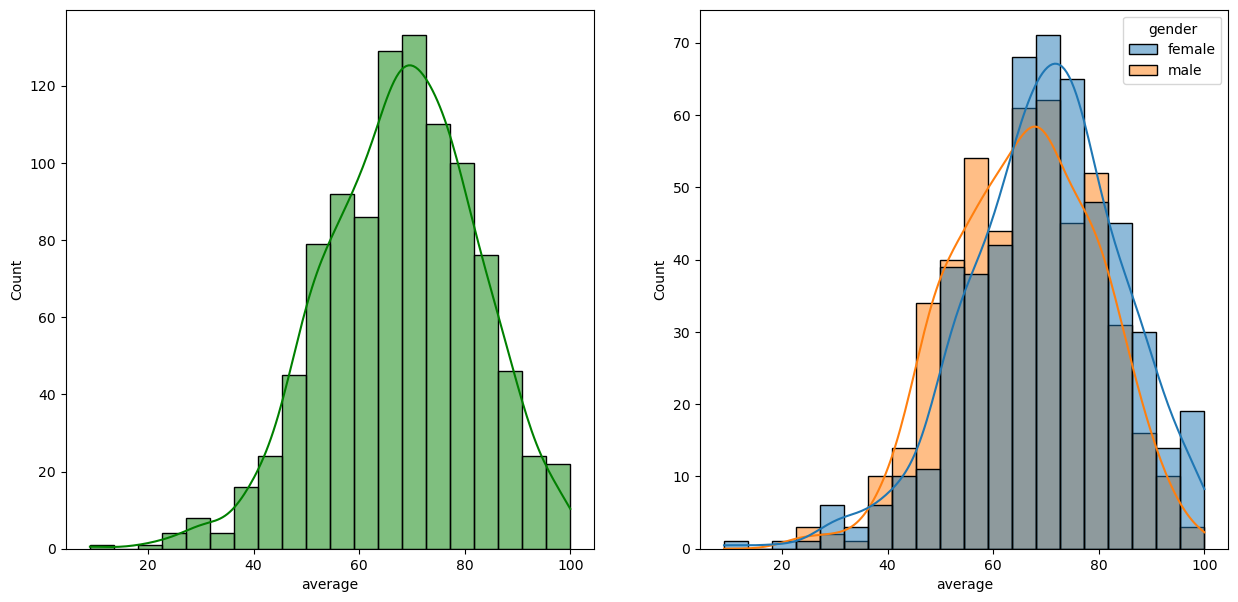

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=20,kde=True,hue='gender')
plt.show()

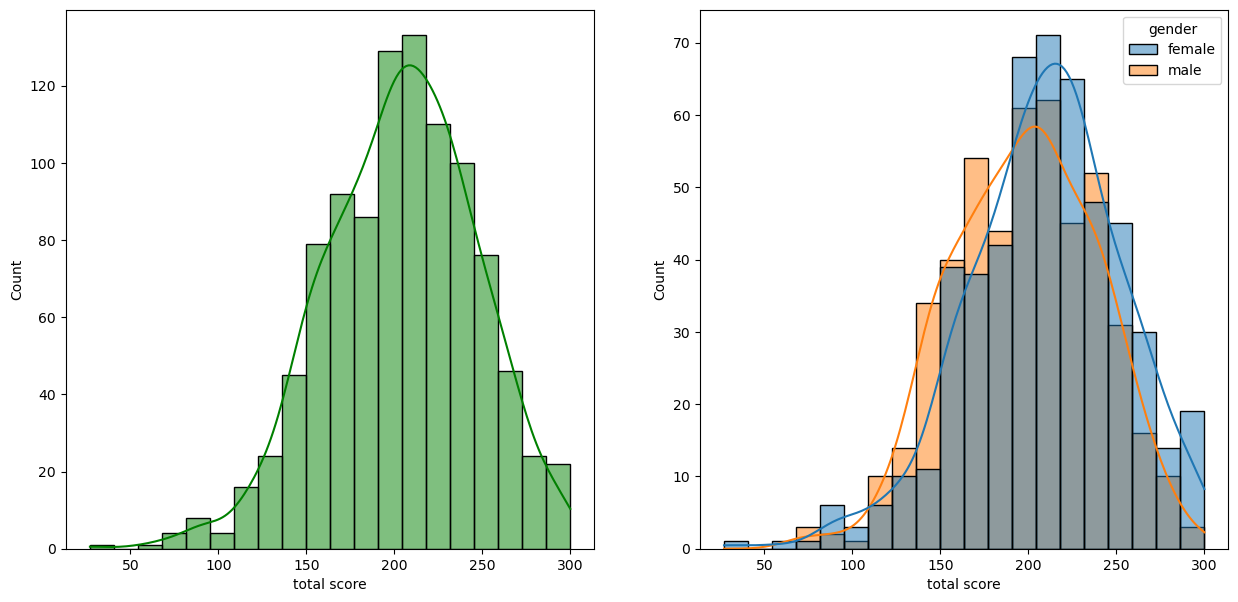

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',bins=20,kde=True,hue='gender')
plt.show()

## Insights
- Female students tends to perform well un exams.

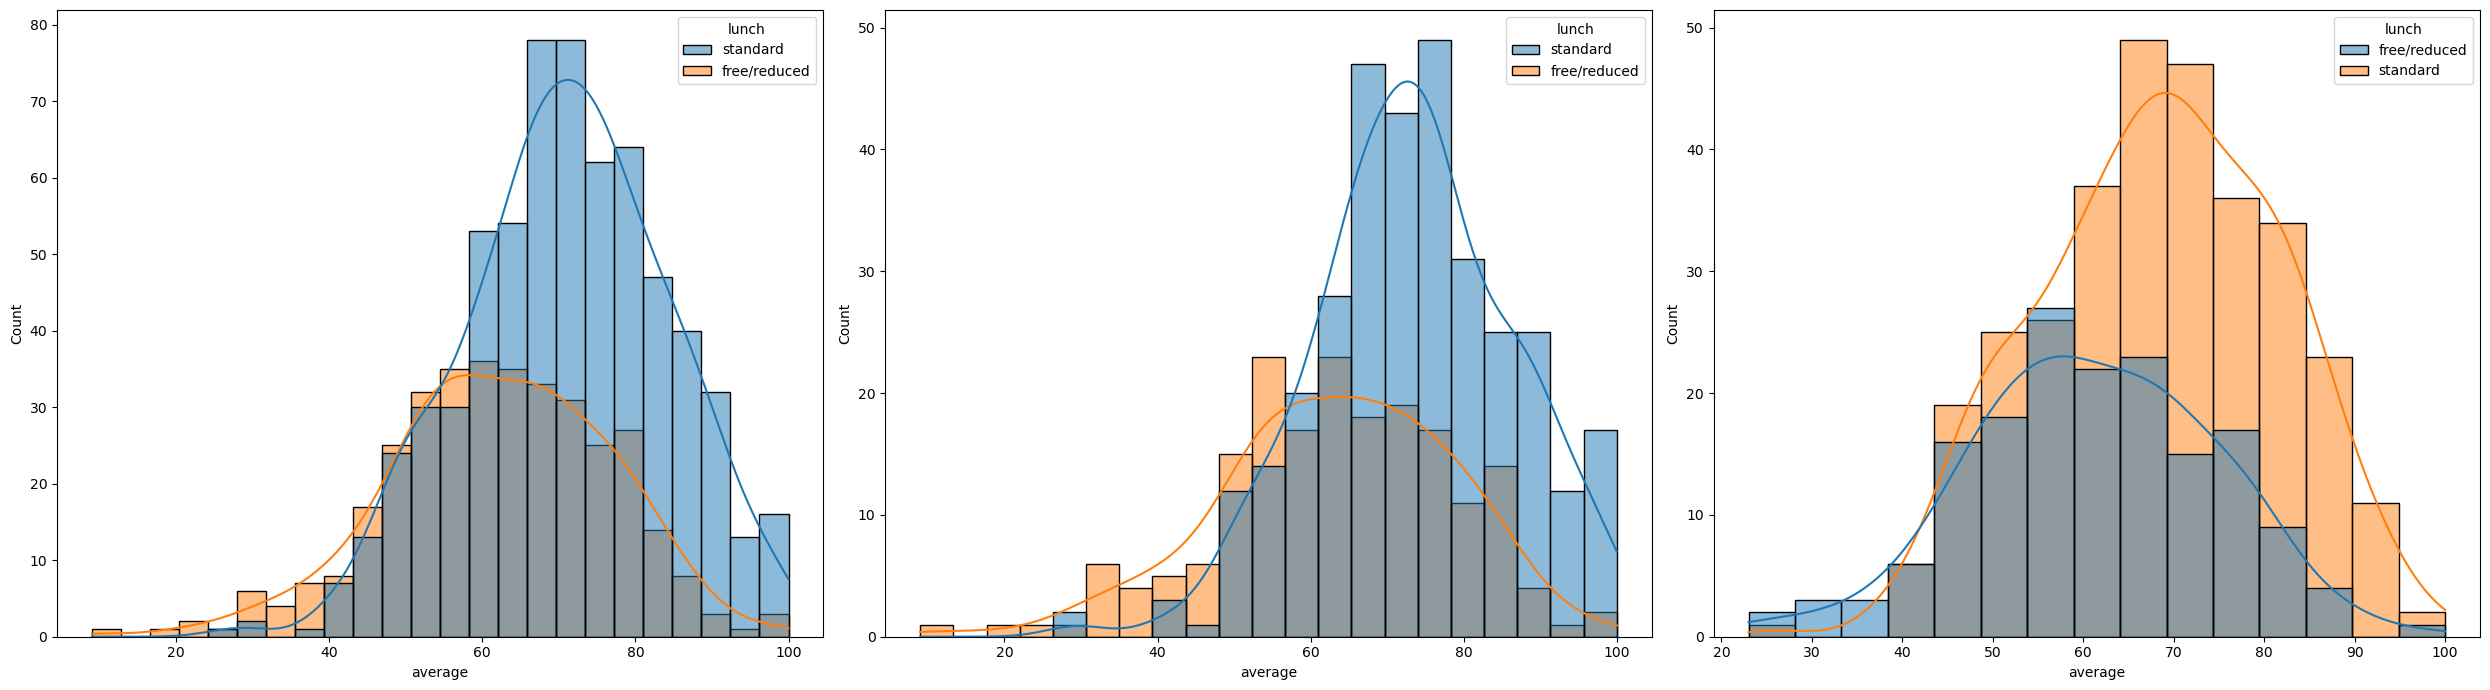

In [74]:
fig, axs= plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.tight_layout()
plt.show()

## Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

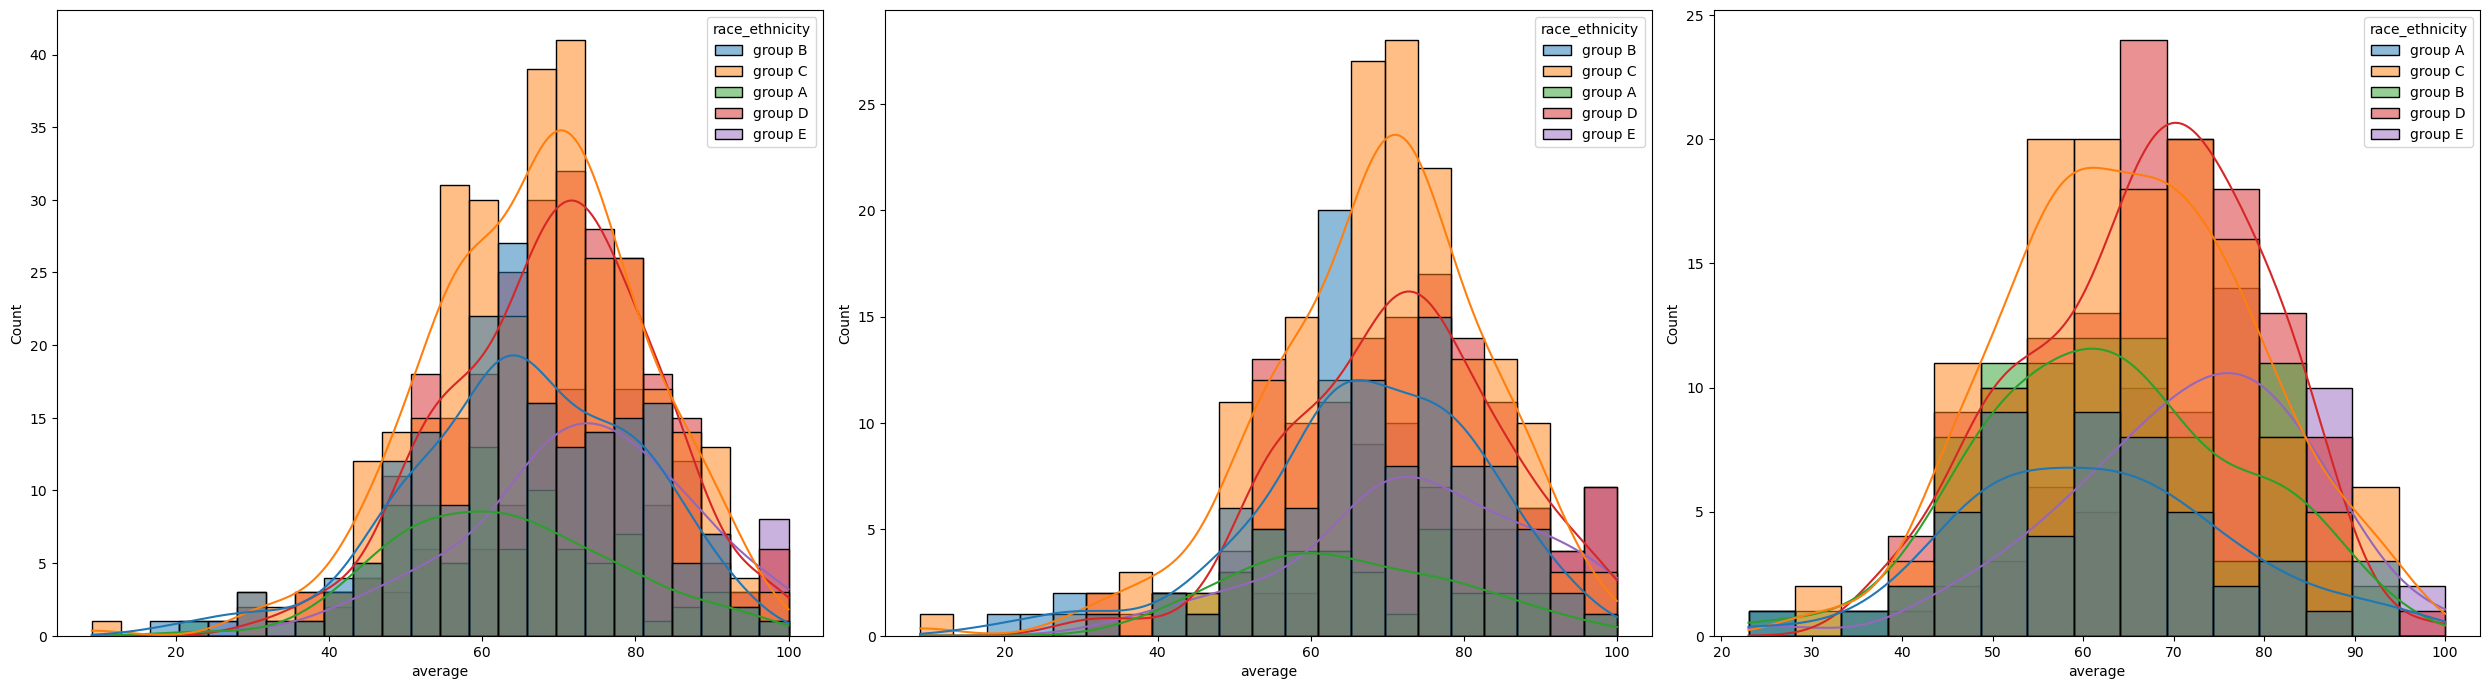

In [79]:
fig, axs= plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.tight_layout()
plt.show()

## Insights
- Students of group A and group B tends to perform poorly in exam average(60-65)%.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female aveagae(60-65)%